<a href="https://colab.research.google.com/github/Oscar19922017/Ciencia-de-Datos/blob/master/Proyecto_Hose_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Contexto del Problema**

Pídale a un comprador de vivienda que describa la casa de sus sueños, y probablemente no comenzará con la altura del techo del sótano o la proximidad a un ferrocarril de este a oeste. Pero el conjunto de datos de esta competencia en el patio de recreo demuestra que influye mucho más en las negociaciones de precios que el número de dormitorios o una valla blanca.

Con 79 variables explicativas que describen (casi) todos los aspectos de las viviendas residenciales en Ames, Iowa, esta competencia lo desafía a predecir el precio final de cada casa.

El conjunto de datos de Ames Vivienda fue compilado por Dean De Cock para su uso en la educación científica de datos. Es una alternativa increíble para los científicos de datos que buscan una versión modernizada y ampliada del conjunto de datos de Boston Housing que se cita a menudo.
http://jse.amstat.org/v19n3/decock.pdf

# **2) Conocimiento de Datos** 

**Importar Librerias**

In [296]:
import numpy as np # Calculos Matematicos
import pandas as pd # Depuracion de Datos
import matplotlib.pyplot as plt # Graficos Estadisticos
import seaborn as sns # Graficos Estadisticos
from scipy.stats import  shapiro # Pruebas de Hipotesis 
from scipy.stats import chi2_contingency # Pruebas Hipotesis

# Modelacion es Ml
from sklearn.model_selection import train_test_split # Dividir la data en entraniemo y prueba

**Importar los datos**

Descripciones de archivos:

* train.csv : el conjunto de entrenamiento
* test.csv : el conjunto Activo
* data_description.txt : descripción completa de cada columna, originalmente preparada por Dean De Cock pero ligeramente editada para que coincida con los nombres de columna utilizados aquí

In [297]:
# Historia 
df = pd.read_csv("/content/drive/MyDrive/Diplomado_2021_01/Análisis Descriptivo y Exploratorio/Insumos/House_Price/train.csv")
# Casas Activas, para predecir su precio
df_1 = pd.read_csv("/content/drive/MyDrive/Diplomado_2021_01/Análisis Descriptivo y Exploratorio/Insumos/House_Price/test.csv")

In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Revisamos los Datos**

**Dimension de la Data H**

In [299]:
df.shape

(1460, 81)

**Dimension Data Activa**

In [300]:
df_1.shape

(1459, 80)

**Extructura**

In [301]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Diccionario de la Base de Datos**

Campos de información
Aquí hay una versión breve de lo que encontrará en el archivo de descripción de datos.

* SalePrice : el precio de venta de la propiedad en dólares. Esta es la variable objetivo que está tratando de predecir.
* MSSubClass : la clase de construcción
* MSZoning : la clasificación general de zonificación
* LotFrontage : pies lineales de calle conectados a la propiedad
* LotArea : Tamaño del lote en pies cuadrados
* Calle : Tipo de acceso por carretera
* Callejón : Tipo de acceso al callejón
* LotShape : forma general de la propiedad
* LandContour : Planitud de la propiedad
* Utilidades : tipo de utilidades disponibles
* LotConfig : configuración del lote
* LandSlope : Pendiente de la propiedad
* Vecindario : ubicaciones físicas dentro de los límites de la ciudad de Ames
* Condition1 : Proximidad a la carretera principal o al ferrocarril
* Condición 2 : Proximidad a la carretera principal o al ferrocarril (si hay un segundo)
* BldgType : Tipo de vivienda
* HouseStyle : estilo de vivienda
* OverallQual : Material general y calidad de acabado.
* OverallCond : Calificación de estado general
* Año de construcción: fecha de construcción original
* YearRemodAdd : fecha de remodelación
* RoofStyle : Tipo de techo
* RoofMatl : material del techo
* Exterior1st : Revestimiento exterior de la casa
* Exterior2nd : Revestimiento exterior de la casa (si hay más de un material)
* MasVnrType : tipo de chapa de mampostería
* MasVnrArea : Área de revestimiento de mampostería en pies cuadrados
* ExterQual : Calidad del material exterior
* ExterCond : Estado actual del material en el exterior
* Fundación : Tipo de fundación
* BsmtQual : Altura del sótano
* BsmtCond : Estado general del sótano
* BsmtExposure : Paredes de sótano a nivel de jardín o de salida
* BsmtFinType1 : Calidad del área terminada del sótano
* BsmtFinSF1 : pies cuadrados terminados tipo 1
* BsmtFinType2 : Calidad de la segunda área terminada (si está presente)
* BsmtFinSF2 : pies cuadrados con acabado tipo 2
* BsmtUnfSF : pies cuadrados sin terminar de área del sótano
* TotalBsmtSF : Total de pies cuadrados de área del sótano
* Calefacción : Tipo de calefacción
* Calefacción QC : calidad y estado de la calefacción
* CentralAir : aire acondicionado central
* Eléctrico : sistema eléctrico
* 1stFlrSF : pies cuadrados del primer piso
* 2ndFlrSF : pies cuadrados del segundo piso
* LowQualFinSF : pies cuadrados con acabado de baja calidad (todos los pisos)
* GrLivArea : pies cuadrados de área habitable sobre el nivel (suelo)
* BsmtFullBath : Baños completos en el sótano
* BsmtHalfBath : Medios baños del sótano
* FullBath : baños completos sobre rasante
* HalfBath : Medios baños sobre el nivel del suelo
* Dormitorio : número de dormitorios sobre el nivel del sótano
* Cocina : Número de cocinas
* KitchenQual : calidad de la cocina
* TotRmsAbvGrd : Total de habitaciones sobre rasante (no incluye baños)
* Funcional : clasificación de funcionalidad del hogar
* Chimeneas : Número de chimeneas
* FireplaceQu : Calidad de chimenea
* GarageType : Ubicación del garaje
* GarageYrBlt : año en que se construyó el garaje
* GarageFinish : Acabado interior del garaje
* GarageCars : Tamaño del garaje en capacidad de automóvil
* GarageArea : Tamaño del garaje en pies cuadrados
* GarageQual : Calidad de garaje
* GarageCond : Estado del garaje
* PavedDrive : entrada pavimentada
* WoodDeckSF : Área de la plataforma de madera en pies cuadrados
* OpenPorchSF : Área de porche abierto en pies cuadrados
* Porche cerrado : área de porche cerrado en pies cuadrados
* 3SsnPorch : área de porche de tres estaciones en pies cuadrados
* ScreenPorch : Área del porche de la pantalla en pies cuadrados
* PoolArea : Área de la piscina en pies cuadrados
* PoolQC : Calidad de la piscina
* Valla : calidad de la valla
* MiscFeature : característica miscelánea no cubierta en otras categorías
* MiscVal : $ Valor de la función miscelánea
* MoSold : Mes vendido
* YrSold : año vendido
* SaleType : Tipo de venta
* SaleCondition : Condición de venta

# **3) Análisis Exploratorio y Descriptivo**

**Naturaleza de Variables**

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [303]:
pd.options.display.max_columns = 100
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


**Recodificar**
* Id debe ser texto

**Recodificar a Categóricas:**
* Recodificar a Categóricas:
* MSSubClass: identifica el tipo de vivienda, debe ser categórica
* MSZoning: Identifica la clasificación de zonificación general de la venta
* Street: Tipo de acceso por carretera a la propiedad
* Alley: Tipo de callejón de acceso a la propiedad
* LotShape: Forma general de propiedad
* LandContour: Planitud de la propiedad
* Utilities: Tipo de utilidades disponibles
* LotConfig: Configuración de lote
* LandSlope: Pendiente de propiedad
* Neighborhood: Ubicaciones físicas dentro de los límites de la ciudad de Ames
* Condition1: Proximidad a diversas condiciones
* Condition2: Proximidad a varias condiciones (si más de una está presente)
* BldgType: Tipo de vivienda
* HouseStyle: Tipo de vivienda
* OverallQual:Califica el material general y el acabado de la casa
* OverallCond: Valora el estado general de la casa.
* YearBuilt: Fecha de construcción original
* YearRemodAdd: Fecha de remodelación (igual que la fecha de construcción si no hay remodelaciones o adiciones)
* RoofStyle: Tipo de techo
* RoofMatl: material del techo
* Exterior1st: Revestimiento exterior de la casa
* Exterior2nd: Revestimiento exterior de la casa (si hay más de un material)
* MasVnrType: tipo de chapa de mampostería
* ExterQual: Evalúa la calidad del material en el exterior
* ExterCond: Evalúa el estado actual del material en el exterior
* fundación: Tipo de fundación
* BsmtQual: Evalúa la altura del sótano
* BsmtCond: Evalúa el estado general del sótano
* BsmtExposure: se refiere a las paredes de huelga o al nivel del jardín.
* BsmtFinType1: Clasificación del área terminada del sótano
* BsmtFinType2: Calificación del área terminada del sótano (si hay varios tipos)
* Heating: Tipo de calefacción
* HeatingQC: calidad y estado de la calefacción
* CentralAir: aire acondicionado central
* Eléctrico: sistema eléctrico
* KitchenQual: calidad de la cocina
* Funcional: funcionalidad del hogar (suponga que es típico a menos que se justifiquen las deducciones)
* FireplaceQu: Calidad de chimenea
* GarageType: Ubicación del garaje
* GarageYrBlt: año en que se construyó el garaje
* GarageFinish: Acabado interior del garaje
* GarageQual: Calidad de garaje
* GarageCond: Estado del garaje
* PavedDrive: entrada pavimentada
* PoolQC: Calidad de la piscina
* Fence: calidad de la valla
* MiscFeature: característica miscelánea no cubierta en otras categorías
* SaleType: Tipo de venta
* SaleCondition: Condición de venta

In [304]:
df["Id"]=df["Id"].astype("str") # convertir en Texto
# convertrmos las variables tipo categoricas a category
df[["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope",
    "Neighborhood","Condition1","Condition2","BldgType",	"HouseStyle",
    "OverallQual",	"OverallCond","YearBuilt","YearRemodAdd",
    "RoofStyle",	"RoofMatl",	"Exterior1st",	"Exterior2nd",	"MasVnrType",
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure',"BsmtFinType1", 'BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu', 'GarageType',
   'GarageYrBlt', 'GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive','PoolQC',
       'Fence', 'MiscFeature','SaleType',
       'SaleCondition']]=df[["MSSubClass","MSZoning","Street","Alley","LotShape",
                         "LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType",	
                         "HouseStyle","OverallQual",	"OverallCond","YearBuilt","YearRemodAdd",
                         "RoofStyle",	"RoofMatl",	"Exterior1st",	"Exterior2nd",	"MasVnrType",
                         'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure',"BsmtFinType1", 'BsmtFinType2','Heating',
       'HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu', 'GarageType',
                                       'GarageYrBlt', 'GarageFinish','GarageQual',
       'GarageCond', 'PavedDrive','PoolQC',
       'Fence', 'MiscFeature','SaleType',
       'SaleCondition']].astype("category") # convertir en categoria

**Datos Perdidos o Nas**

In [305]:
pd.options.display.max_rows=81
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [306]:
df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

* Podemos Elimiar las Variables que tengan Nas mayor al 50%
* Para Proporciones Bajas, podemos eliminar la proporcion de la data o imputar los Nas de la Variable que presenta datos perdidos

In [307]:
df=df.drop(["MiscFeature","PoolQC","Fence","FireplaceQu","Alley"],axis=1)

In [308]:
df.shape

(1460, 76)

In [309]:
df.isnull().sum()/len(df)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

## **Vamos a eliminar todos los Nas**

In [310]:
df_Sin_na=df.dropna()

In [311]:
#df_Sin_na.isnull().sum()

In [312]:
((len(df)-len(df_Sin_na))/len(df))*100

25.068493150684933

In [313]:
len(df)

1460

In [314]:
len(df_Sin_na)

1094

## **Imputar con Inferencia Estadistica**

**Imputar Distancia a la Calle**

In [315]:
Distancia_Calle=df["LotFrontage"]

In [316]:
Distancia_Calle=Distancia_Calle.dropna()

In [317]:
len(Distancia_Calle)

1201

**Distribuccion de los datos**

**Histograma**

Un histograma es la representación gráfica en forma de barras, que simboliza la distribución de un conjunto de datos. Sirven para obtener una "primera vista" general, o panorama, de la distribución de la población, o de la muestra, respecto a una característica, cuantitativa y continua.

In [318]:
Promedio_Original_D=np.mean(Distancia_Calle)

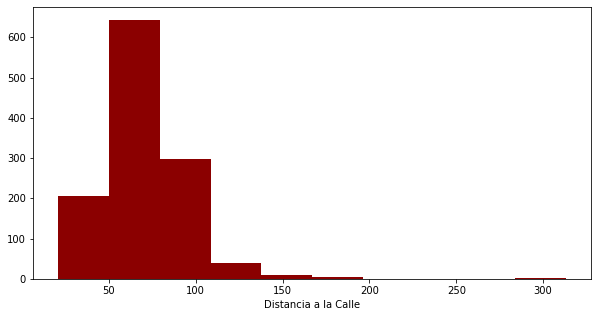

In [319]:
plt.figure(figsize=(10,5))
plt.hist(Distancia_Calle,facecolor="darkred")
plt.xlabel("Distancia a la Calle")
plt.show()

## **Identificar Valores Atipicos**

**Manera Visual: Boxplot**

Para dibujar el diagrama de caja necesitas conocer los valores de posición, llamados cuartiles 1 ,2 y 3. La longitud de la caja es el rango intercuartílico (q3-q1). Y la longitud de los «palos» (las líneas que salen de la caja) son los valores extremos. También necesitas saber cúales son los valores «raros» o outliers. Los dibujarás con un puntito o una crucecita.

In [320]:
Distancia_Calle.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

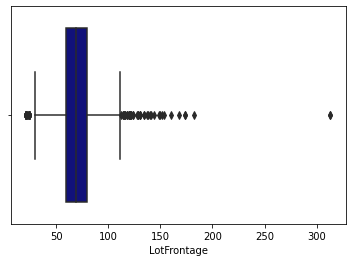

In [321]:
sns.boxplot(x=Distancia_Calle,color="darkblue")

**Metodo del Rango Intercuantil**

In [322]:
q1,q3 = np.percentile(Distancia_Calle,[25,75])
print(q1)
print(q3)

59.0
80.0


**Limites**

In [323]:
RIC=(q3-q1)
print(RIC)

21.0


In [324]:
Limite_Superior= q3+(1.5*RIC)
print(Limite_Superior)

111.5


In [325]:
Limite_Inferior= q1-(1.5*RIC)
print(Limite_Inferior)

27.5


**Graficamos los puntos A**

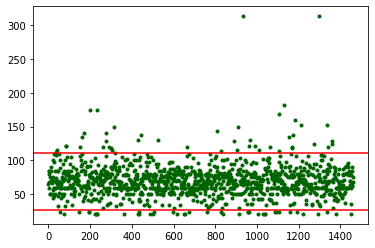

In [326]:
plt.plot(Distancia_Calle,".",color="darkgreen")
plt.axhline(y=Limite_Inferior,color="red",linestyle="-")
plt.axhline(y=Limite_Superior,color="red",linestyle="-")
plt.show()

**Excluimos los datos Atipicos**

In [327]:
df_sin_Calle_Atipicas=df[(df["LotFrontage"]<Limite_Superior) & (df["LotFrontage"]>Limite_Inferior)]

In [328]:
df_sin_Calle_Atipicas.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [329]:
Distancia_Calle_sin_Atipicos=df_sin_Calle_Atipicas["LotFrontage"]

In [330]:
Distancia_Calle_sin_Atipicos=Distancia_Calle_sin_Atipicos.dropna()

In [331]:
Distancia_Calle_sin_Atipicos.describe()

count    1113.000000
mean       68.955076
std        16.656489
min        30.000000
25%        60.000000
50%        69.000000
75%        80.000000
max       111.000000
Name: LotFrontage, dtype: float64

In [332]:
Promedio_Original_D

70.04995836802665

In [333]:
Promedio_sin_Atipico=np.mean(Distancia_Calle_sin_Atipicos)
Promedio_sin_Atipico

68.95507637017072

**Histograma Sin A**

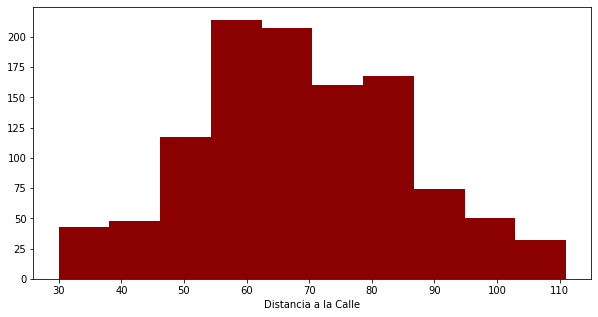

In [334]:
plt.figure(figsize=(10,5))
plt.hist(Distancia_Calle_sin_Atipicos,facecolor="darkred")
plt.xlabel("Distancia a la Calle")
plt.show()

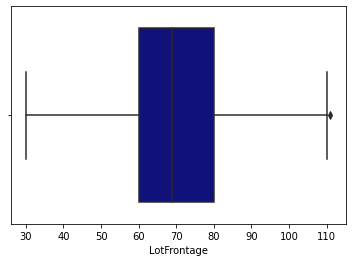

In [335]:
sns.boxplot(x=Distancia_Calle_sin_Atipicos,color="darkblue")

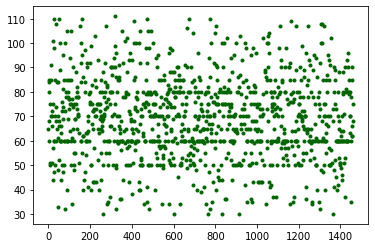

In [336]:
plt.plot(Distancia_Calle_sin_Atipicos,".",color="darkgreen")
plt.show()

## **Validar Normalidad**

**Test de Normalidad Grafico: q-q plot**

In [337]:
from statsmodels.graphics.gofplots import qqplot

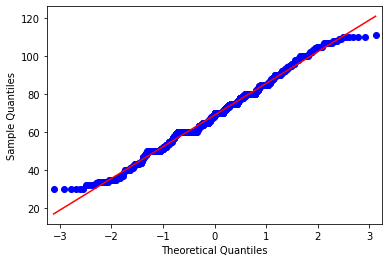

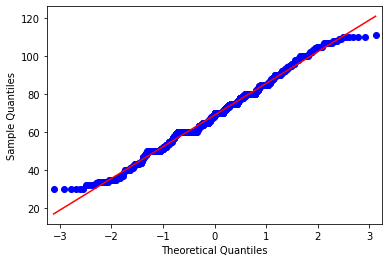

In [338]:
qqplot(Distancia_Calle_sin_Atipicos,line="s")

**Test de Normalidad Estadistica**

Test Estadistico Prueba Estadistica de Normalidad Probar Estadisticamente:

* H0: La distribucion de la Distancia  es Normal
* Ha: La distribucion de la Distancia no es Normal

alpha=0.05

* Si p valor < 0.05, Se Rechaza Normalidad
* Si p valor > 0.05, Se Acepta Normalidad

In [339]:
stat, p= shapiro(Distancia_Calle_sin_Atipicos)
'{:f}'.format(p)

'0.000003'

In [340]:
if (p <= 0.05):
  print("la Variables No es Normal")
else:
  print("La Variable  es Normal")


la Variables No es Normal


**Consecuencias de la falta de normalidad**


El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos (t-test, anova,…) y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.

**Test de Promedio**


*  Ho= Promeido de Distancias = 70.04
* Ha = Promedios es Diferente 70.04

 alfa = 0.05

 * Si p valor < 0.05, Re rechaza h0
 * Si P valor > 0.05, Se Acepta H0

In [341]:
from scipy.stats import ttest_1samp
print(Promedio_sin_Atipico)

68.95507637017072


In [342]:
test,pvalor= ttest_1samp(Distancia_Calle_sin_Atipicos,Promedio_sin_Atipico)

In [343]:
pvalor

1.0

In [344]:
if (pvalor <= 0.05):
  print("el promedio no es el aproximado al real")
else:
  print("el Promedio es el aproximado al real")

el Promedio es el aproximado al real


## **Enfoque no Parametrico para calcular un parametro Poblacional**

**Enfoque No Parametrico** en python apenas se esta implementando, 
se hace mejor en R

**Remuestreo: Simuacion computacional**

In [345]:
Promedio_sin_Atipico

68.95507637017072

In [346]:
from random import sample
import math

**Seleccionamos Muestra Aleatoria**

In [347]:
len( Distancia_Calle)

1201

In [348]:
Muestra= Distancia_Calle.sample(n=1000,replace=False)

In [349]:
len(Muestra)

1000

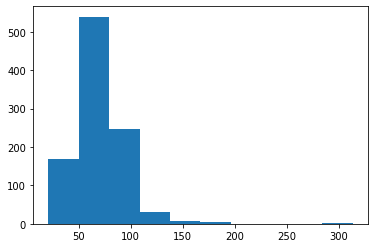

In [350]:
plt.hist(Muestra)
plt.show()

**Remuestreo**

In [351]:
Muestra_Promedios=[]# Lista Vacia
for i in range(100000):
  Muestra_N= Muestra.sample(n=500,replace=True)
  Muestra_Promedios.append(Muestra_N.mean())

**Medias de Medias Remuestradas**

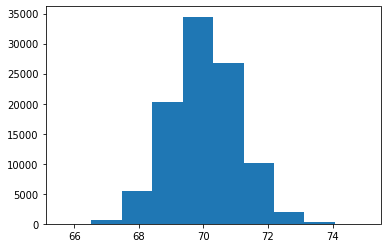

In [352]:
plt.hist(Muestra_Promedios)
plt.show()

In [353]:
Muestra_Promedios1=pd.Series(Muestra_Promedios)

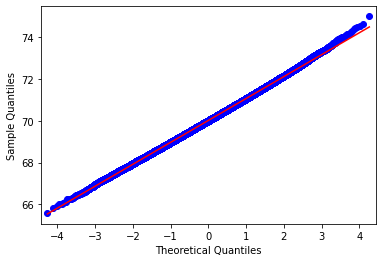

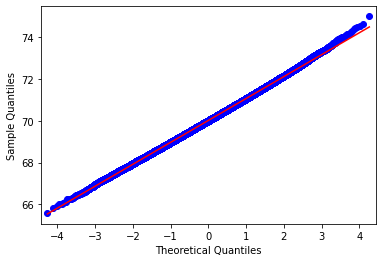

In [354]:
qqplot(Muestra_Promedios1,line="s")

In [355]:
Promedio_Remuestreo= np.mean(Muestra_Promedios1)
print(Promedio_Remuestreo)

70.02222953999966


In [356]:
Promedio_sin_Atipico

68.95507637017072

## **Imputar Nas por Promedio**

In [357]:
df["LotFrontage"]=df["LotFrontage"].replace(np.nan,Promedio_Remuestreo)

In [358]:
df.isnull().sum()/len(df)*100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinSF1       0.000000
BsmtFinType2     2.602740
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

## **Eliminamos Todos los Nas; ya que la proporcion que hay es pequeñas**

In [359]:
df1=df.dropna()

In [360]:
df1.isnull().sum()/len(df1)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [361]:
1-len(df1)/len(df)
df=df1

* En este punto no tenemos datos perdidos, hemos perdido solo el 8 % de la data original

## **Analisis Variables Categoricas**

**Detectamos las Variables Categoricas**

**Variables MSZoning**


  * A	Agriculture
  * C	Commercial
  * FV	Floating Village Residential
  * I	Industrial
  * RH	Residential High Density
  * RL	Residential Low Density
  * RP	Residential Low Density Park 
  * RM	Residential Medium Density


In [362]:
pd.value_counts(df["MSZoning"])

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

**Distribuccion %**

In [363]:
(pd.value_counts(df["MSZoning"])/len(df))*100

RL         79.671151
RM         14.275037
FV          4.633782
RH          0.822123
C (all)     0.597907
Name: MSZoning, dtype: float64

**Grafico**

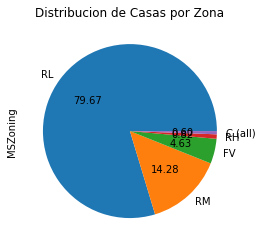

In [364]:
plot= df["MSZoning"].value_counts().plot(kind="pie",autopct="%.2f",title="Distribucion de Casas por Zona")

**Variable Categorica Vs Categorica**

**BldgType**

* 1Fam	Single-family Detached	
* 2FmCon	Two-family Conversion; originally built as one-family dwelling
* Duplx	Duplex
* TwnhsE	Townhouse End Unit
* TwnhsI	Townhouse Inside Unit


In [365]:
pd.value_counts(df["BldgType"])

1Fam      1138
TwnhsE     112
Twnhs       38
Duplex      28
2fmCon      22
Name: BldgType, dtype: int64

## **Analisis de Contingencia**

**Tabla Cruzada**

In [366]:
pd.crosstab(df["BldgType"],df["MSZoning"])

MSZoning,C (all),FV,RH,RL,RM
BldgType,,,,,
1Fam,7,36,7,966,122
2fmCon,1,0,0,12,9
Duplex,0,0,2,21,5
Twnhs,0,9,0,10,19
TwnhsE,0,17,2,57,36


**Subtotales**

In [367]:
pd.crosstab(df["BldgType"],df["MSZoning"],margins=True)

MSZoning,C (all),FV,RH,RL,RM,All
BldgType,,,,,,
1Fam,7,36,7,966,122,1138
2fmCon,1,0,0,12,9,22
Duplex,0,0,2,21,5,28
Twnhs,0,9,0,10,19,38
TwnhsE,0,17,2,57,36,112
All,8,62,11,1066,191,1338


**Test de Indepedencia**

* H0: Las Variables Tipo de casa y Zona son Independientes
* Ha: Las Variables Tipo de casa y Zona son Dependientes

* Si p valor < 0.05; se rechaza H0, Las variables Son Dependientes



**Test chi2**

In [368]:
tc= pd.crosstab(index=df["BldgType"],columns=df["MSZoning"])

In [369]:
c,p,pchi, test=chi2_contingency(tc)

In [370]:
'{:f}'.format(p)

'0.000000'

**Las Variables estan relacionadas estadisticamente, por lo tanto para un posible modelo, deben incluirse**

## **Variables Categoricas con Numericas**

**ANOVA**
El Análisis de varianza (ANOVA) es un método estadístico utilizado para evaluar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetro


**Visualmente**

In [371]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

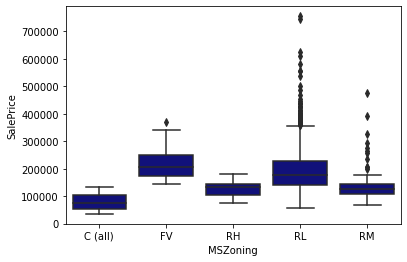

In [372]:
sns.boxplot(x=df["MSZoning"],y=df["SalePrice"],data=df,color="darkblue")

In [373]:
from  scipy import stats

In [374]:
grupo= df[["MSZoning","SalePrice"]].groupby("MSZoning")
grupo.head(5)

,MSZoning,SalePrice
0,RL,208500
1,RL,181500
2,RL,223500
3,RL,140000
4,RL,250000
8,RM,129900
15,RM,132000
21,RM,139400
23,RM,129900
29,RM,68500


**Test Estadistico**

In [375]:
f_val,p_val= stats.f_oneway(grupo.get_group("RL")["SalePrice"],grupo.get_group("RM")["SalePrice"],
                           grupo.get_group("FV")["SalePrice"],grupo.get_group("RH")["SalePrice"],
                           grupo.get_group("C (all)")["SalePrice"])

In [376]:

'{:f}'.format(p_val)

'0.000000'

* **Los grupos estan relacionados con el precio de venta**

## **Numericas y Numericas**

**Correlación de Pearson**

La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.

El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:

* 1: correlación lineal positiva total.
* 0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
* -1: correlación lineal negativa total

In [377]:
df.corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.299959,0.176172,0.220481,0.039959,0.103494,0.378071,0.410505,0.067563,0.010355,0.362847,0.103010,-0.000868,0.172437,0.038260,0.246402,0.007739,0.320922,0.229243,0.268579,0.332627,0.069627,0.143877,0.015044,0.064472,0.031836,0.185926,-0.000804,0.013529,0.011716,0.327832
LotArea,0.299959,1.000000,0.096727,0.210148,0.110493,-0.014589,0.267188,0.288502,0.047773,0.009729,0.255445,0.160687,0.046420,0.115727,0.006052,0.120369,-0.012611,0.185654,0.263061,0.138228,0.168630,0.167822,0.084942,-0.017968,0.019326,0.038489,0.077050,0.040824,0.000118,-0.012066,0.254757
MasVnrArea,0.176172,0.096727,1.000000,0.253015,-0.083303,0.104662,0.365629,0.341001,0.169730,-0.061707,0.392006,0.078875,0.015804,0.272271,0.193268,0.108829,-0.007299,0.289758,0.229365,0.363916,0.367237,0.149182,0.129015,-0.112225,0.015221,0.052474,0.009334,-0.028975,-0.013461,-0.001521,0.465811
BsmtFinSF1,0.220481,0.210148,0.253015,1.000000,-0.064855,-0.552809,0.505000,0.450366,-0.151876,-0.051909,0.201974,0.638094,0.057227,0.045094,-0.025251,-0.119100,-0.035623,0.046284,0.245323,0.197559,0.284095,0.187178,0.107561,-0.105669,0.026811,0.051906,0.142708,0.007869,-0.021242,0.023958,0.359677
BsmtFinSF2,0.039959,0.110493,-0.083303,-0.064855,1.000000,-0.233449,0.083184,0.094065,-0.109254,0.007072,-0.021993,0.154980,0.072813,-0.090448,-0.038494,-0.008179,-0.028278,-0.042207,0.035643,-0.080264,-0.053411,0.061206,0.004211,0.045668,-0.031475,0.085865,0.041148,0.006246,-0.022039,0.032855,-0.031226
BsmtUnfSF,0.103494,-0.014589,0.104662,-0.552809,-0.233449,1.000000,0.363767,0.318097,-0.016117,-0.002384,0.222438,-0.463986,-0.105359,0.305802,-0.074157,0.154935,0.081795,0.242020,0.033157,0.242278,0.195401,-0.020711,0.122171,-0.003372,0.023701,-0.023065,-0.039315,-0.018566,0.031202,-0.039076,0.191689
TotalBsmtSF,0.378071,0.267188,0.365629,0.505000,0.083184,0.363767,1.000000,0.893110,-0.234070,-0.058411,0.460778,0.282031,-0.019716,0.345685,-0.124788,0.029989,0.036844,0.297609,0.328103,0.453427,0.511475,0.214364,0.255939,-0.104484,0.043142,0.068886,0.135654,-0.008679,0.000787,-0.001823,0.602042
1stFlrSF,0.410505,0.288502,0.341001,0.450366,0.094065,0.318097,0.893110,1.000000,-0.220279,-0.019860,0.554846,0.251597,-0.000064,0.367498,-0.146494,0.100643,0.059242,0.393786,0.401929,0.440237,0.500071,0.233200,0.226615,-0.056003,0.053159,0.083054,0.134879,-0.014226,0.024109,-0.011258,0.604714
2ndFlrSF,0.067563,0.047773,0.169730,-0.151876,-0.109254,-0.016117,-0.234070,-0.220279,1.000000,0.044504,0.685710,-0.184112,-0.023955,0.419523,0.619450,0.509216,0.068464,0.619275,0.188514,0.187208,0.124564,0.081291,0.202791,0.059654,-0.024786,0.035664,0.082753,0.013755,0.042201,-0.034826,0.311354
LowQualFinSF,0.010355,0.009729,-0.061707,-0.051909,0.007072,-0.002384,-0.058411,-0.019860,0.044504,1.000000,0.101100,-0.029155,0.003802,-0.023550,0.000924,0.059138,-0.017759,0.092241,0.001746,-0.017605,0.013996,-0.008740,0.018326,0.050081,-0.000059,0.044837,0.080425,-0.000178,-0.027212,-0.020533,-0.009992


**Grado de Significancia Estadisticancia**

In [378]:
pearson_coef,p_value=stats.pearsonr(df["GarageArea"],df["SalePrice"])

In [379]:
'{:f}'.format(p_value)

'0.000000'

In [380]:
pearson_coef

0.6075353838509896

**La correlacion entre el precio de venta y el area del garage, es estadisticamente Significativa**

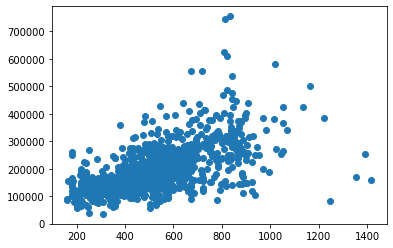

In [381]:
plt.scatter(df["GarageArea"],df["SalePrice"])
plt.show()

**BsmtHalfBath vs Prices**

In [382]:
pearson_coef,p_value=stats.pearsonr(df["BsmtHalfBath"],df["SalePrice"])
p_value

0.270035286659553

* No hay correlacion entre price BsmtHalfBath 

## **Seleccion de Variables Importantes**

## **Metodo de Correlacion**

**Seleccionamos Variables Numericas**

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1338 non-null   object  
 1   MSSubClass     1338 non-null   category
 2   MSZoning       1338 non-null   category
 3   LotFrontage    1338 non-null   float64 
 4   LotArea        1338 non-null   int64   
 5   Street         1338 non-null   category
 6   LotShape       1338 non-null   category
 7   LandContour    1338 non-null   category
 8   Utilities      1338 non-null   category
 9   LotConfig      1338 non-null   category
 10  LandSlope      1338 non-null   category
 11  Neighborhood   1338 non-null   category
 12  Condition1     1338 non-null   category
 13  Condition2     1338 non-null   category
 14  BldgType       1338 non-null   category
 15  HouseStyle     1338 non-null   category
 16  OverallQual    1338 non-null   category
 17  OverallCond    1338 non-null   ca

**Eliminar Id**

In [384]:
df1=df.drop(["Id"],axis=1)

In [387]:
df1.head(2)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


**Automatica de V numericas**

In [389]:
Variables_Numericas=df1._get_numeric_data().columns

In [398]:
df1["MSSubClass"].count()

1338

**Funcion**

In [ ]:
def Seleccion_Numerica(df,pred=None):
  obs=df.shape[0]
  types=df.dtypes
  counts=df.apply(lambda x: x.counts())
  uniques

